## Linear Algebra (CpE210A)
### Laboratory 2: Plotting Vectors using NumPy and MatPlotLib
Coded and submitted by:
Gonzales, Kim Carlo M.
58010

Lab Exercises: 2

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [69]:
'''
GRADED FUNCTION 1 (30 points)

Create a void function that prints that shows the output below. Fill in necessary codes to make fix the functions. 
Replace the 'None' types with the appropriate codes, you may add your lines if you want to improve or customize your code.

Hint: there are two ways to find the magnitude of a displacement. One way is to manually solve using the 
Pythagorean formula, you can try to look into using the np.sqrt() function. Another way is to use the
Euclidean norm or L2 norm using the np.linalg.norm() function. Please explain the new functions that you implemented.

'''
## START OF FUNCTION
def track_eagle(make_figs=True):
    long = np.random.randint(-10,10, size=3) ## since we don't actually have eagle tracking data we will use
    lat = np.random.randint(-10,10, size=3)  ## random integers for this activity. These two lines will produce
                                             ## a vector with shape of (3,) describing the distances for the 
                                             ## eagle's flight.

    dist1 = np.array([long[0],lat[0]])     ## setup the array for each vector for the eagle's flight.
    dist2 = np.array([long[1],lat[1]])
    dist3 = np.array([long[2],lat[2]])

    dist_total = np.array([long[0] + long[1] + long[2], lat[0] + lat[1] + lat[2]]) ## compute for the resultant vector for the eagle's flight.
    disp = np.linalg.norm(np.sqrt([dist_total[0]**2 + dist_total[1]**2]))                                       ## compute for the magnitude of the displacement
    alpha = 10**-6
    theta =  np.arctan((lat[0] + lat[1] + lat[2])/ (long[0] + long[1] + long[2]) + alpha )                            ## compute for the angle of the displacement. Hint
    theta = np.degrees(theta)                ## convert theta from rad to deg.
    
    ## Plotting the PH Eagle flight vectors.
    plt.figure(figsize=(10,10))
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    n = 2
    
    ### Self-discovery code block (Refer to guide question 2 for the task)
    
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue',
              label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
              label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
              label='Displacement: {:.2f}m. @ {:.2f}'.format(disp, theta))
    
    plt.legend()
    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
    plt.show()
    
## END OF FUNCTION  

## Guide questions:
1. What is the use of the variable α? {not}

2. Kindly explain the process of plotting the eagle flight vectors.
plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
Here you could see the code used to plot the eagle's flight vector. The 0,0 in the first two items are the point where the eagle would originate. The next two items are the point where the eagle had to change its direction. The angles and scale_units are used to create the plot with the use of the x-axis and y-axis. color is the color of the vector which in this case is color red. The next one is "label" and format," which is used to create the things that need to be seen in the legend


## Flowchart
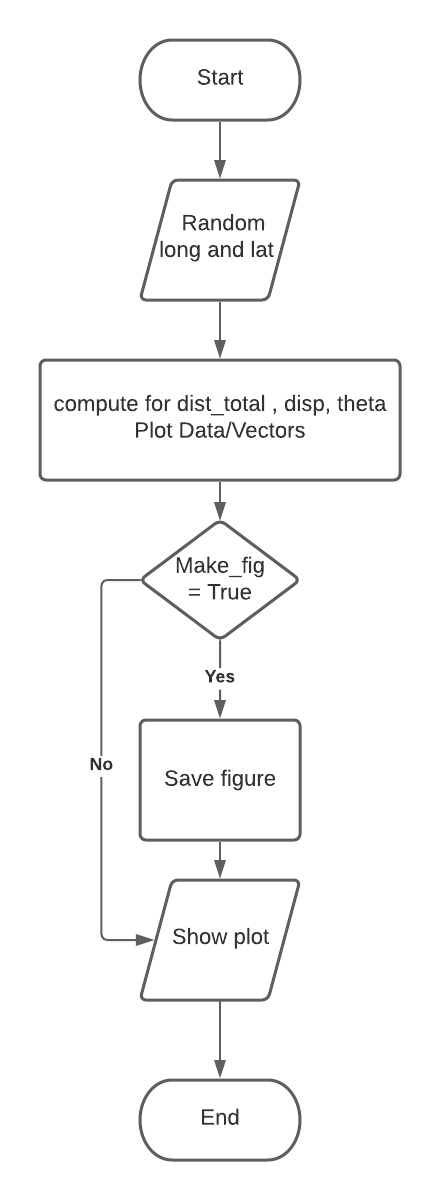

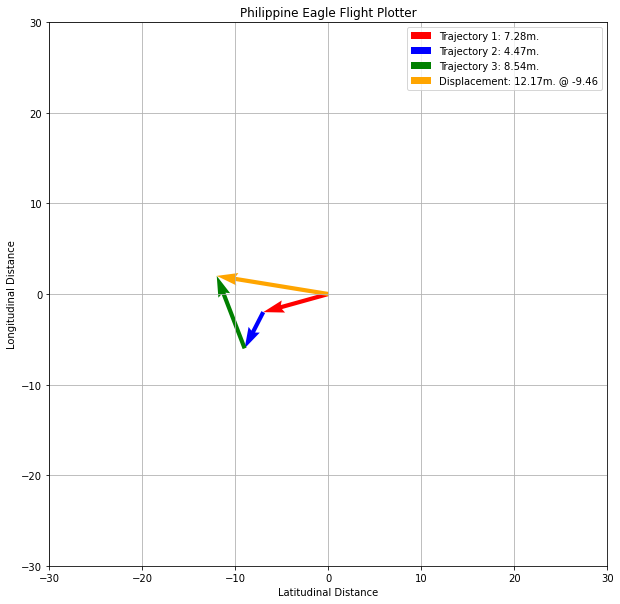

In [70]:
track_eagle(make_figs=True)

In [102]:
'''
GRADED CELL 2 (20 points)
This code models a bad practice among software engineers. The code exhibits a lack of documentation, comments, and vague
variable declarations. Aside from explaining and deconstructing the code, make an appropriate documentation as a markdown,
proper comments for significant lines of code, and changing variable names into easily-understood naming.
'''
def eagle_kinematics(distance, time):
    req_shape = 4
    v = np.zeros((req_shape-1,))
    a = np.zeros((req_shape-2,))
    t_vect = np.array([time**3, time**2, time, 1])
    if distance.shape == (req_shape,):
        v = np.array([3*distance[0],2*distance[1], distance[2]])
        a = np.array([2*v[0],v[1]])
        s_t = np.sum(np.multiply(distance, t_vect))
        v_t = np.sum(np.multiply(v, t_vect[1:]))
        a_t = np.sum(np.multiply(a, t_vect[2:]))
        
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)')
    
    return s_t, v_t, a_t
    
distance_x = np.array([2,1,3,2])
time_x = 2
eagle_kinematics(distance_x, time_x)

(28, 31, 26)

In [113]:
def eagle_kinematics(displacement, time):
    req_shape = 4 
    velocity = np.zeros((req_shape-1,)) # Array with [0,0,0] value
    acceleration = np.zeros((req_shape-2,)) #Array with [0,0] value
    total_vector = np.array([time**3, time**2, time, 1])
    if displacement.shape == (req_shape,): #test if input number of array is sufficent 
        velocity = np.array([3*displacement[0],2*displacement[1], displacement[2]]) # computation for velocity  
        acceleration = np.array([2*velocity[0],velocity[1]]) #computation for acceleration
        displacement_total = np.sum(np.multiply(displacement, total_vector)) #computation for total displacement 
        velocity_total = np.sum(np.multiply(velocity, total_vector[1:])) #computation for total velocity 
        acceleration_total = np.sum(np.multiply(acceleration, total_vector[2:])) #computation for total acceleration
        
        #Error display
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is equal to 4)')
    
    return  displacement_total, velocity_total, acceleration_total #return the values of variables

x = np.array([2,1,3,2])
t = 2
eagle_kinematics(x, t)

(28, 31, 26)

## Guide Questions:
1. What is the function for? Explain the inputs, process, functions used, and the outputs.


2. Kindly provide equations for  st , vt , and  at  basing on their code.


In [109]:
'''
GRADED FUNCTION 3 (50 points)
This is the starter code that you would use for Bebang's project. You may use Part 1 as a reference to complete this code.
Please provide proper documentation, commenting, and necessary revisions to make the code clean and understandable.            
'''
## START OF FUNCTION

def month_profit_trace(profit,reach,make_figs=True): 
     
    if (profit.shape == (4,)) and (reach.shape == (4,)): 
        week1 = np.array([reach[0], profit[0]])    # Rreation of arrays for repective weeks   
        week2 = np.array([reach[1], profit[1]]) 
        week3 = np.array([reach[2], profit[2]]) 
        week4 = np.array([reach[3], profit[3]]) 
        
        # Computation of Final vector
        week_total = np.array([week1[0] + week2[0] + week3[0] + week4[0],
                   week1[1] + week2[1] + week3[1] + week4[1]])
        week_performance = np.sqrt([week_total[0]**2 + week_total[1]**2])
        week_performance = np.linalg.norm(week_performance)
        alpha = 10**-6
        reach_gradient =  np.arctan([(week1[1] + week2[1] + week3[1] + week4[1])/(week1[0] + week2[0] + week3[0] + week4[0]) + alpha ])   # Computation for angle    
        reach_gradient = np.linalg.norm(np.degrees(reach_gradient)) # Convesion to degrees of angle
        # Specification of Cartesian plane
        plt.figure(figsize=(16,5))
        plt.title('Bebang\'s Month Post Efficiency')
        plt.xlim(0,1.01*np.sum(reach))
        plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))
        plt.xlabel('FB Post Reach Increment')
        plt.ylabel('Profit')
        plt.grid()
        n = 2
        
        # Plotting code
        
        # Week 1
        plt.quiver(0,0, week1[0], week1[1], 
                   angles='xy', scale_units='xy',scale=1, color='yellowgreen', width=0.0025,
                   label='Week 1: {:.2f}'.format(np.linalg.norm(week1)))
        # Week 2
        plt.quiver(week1[0], week1[1], week2[0], week2[1], 
                   angles='xy', scale_units='xy',scale=1, color='lightgreen', width=0.0025,
                   label='Week 2: {:.2f}'.format(np.linalg.norm(week2)))
        # Week 3
        plt.quiver(week1[0]+week2[0], week1[1]+week2[1], week3[0], week3[1], 
                   angles='xy', scale_units='xy',scale=1, color='green', width=0.0025,
                   label='Week 3: {:.2f}'.format(np.linalg.norm(week3)))
        # Week 4
        plt.quiver(week1[0]+week2[0]+week3[0], week1[1]+week2[1]+week3[1], week4[0], week4[1], 
                   angles='xy', scale_units='xy',scale=1, color='darkgreen', width=0.0025,
                   label='Week 4: {:.2f}'.format(np.linalg.norm(week4))) 

        
       # Efficency
        plt.quiver(0,0, week_total[0], week_total[1], 
                   angles='xy', scale_units='xy',scale=1, color='red', width=0.005,
                  label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))
        
        plt.legend(loc ='upper left')

        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300)    

        plt.show()
    
    # Error Response 
    else:
        print('Error in filling up the necessary requirement. The error might be:') 
        print('           * Insuffecient number of value in profit or reach.')
        print('           * Greater than 4 weeks was inputed as a value of profit or reach.')
        print('Solution: Edit the number of items inside the array, make it equal to 4.')
        print('          ONLY have 4 items inside profit and reach.')
    
## END OF FUNCTION  


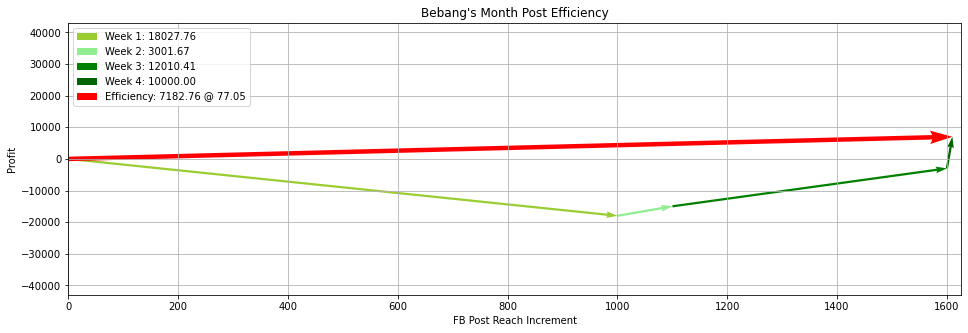

In [114]:
profit= np.array([-18000, 3000, 12000, 10000])    ## You can change the values to make different scenarios
reach = np.array([1000, 100, 500, 10])             ## You can change the values to make different scenarios

month_profit_trace(profit, reach, make_figs=False) ## Toggle 'make_figs' during debugging or making documentations

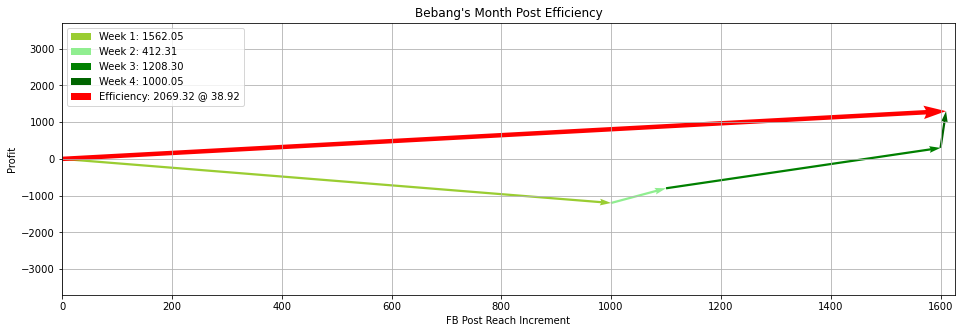

In [110]:
profits1= np.array([-1200, 400, 1100, 1000]) 
reachs1 = np.array([1000, 100, 500, 10]) 
month_profit_trace(profits1,reachs1,make_figs=False)

55.49149540168461


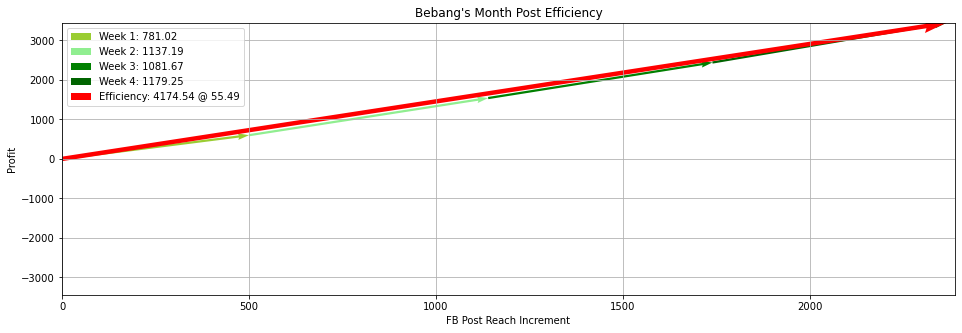

In [95]:
profits2= np.array([600, 940, 900, 1000]) 
reachs2 = np.array([500, 640, 600, 625]) 
month_profit_trace(profits2,reachs2,make_figs=False)

83.84483231542325


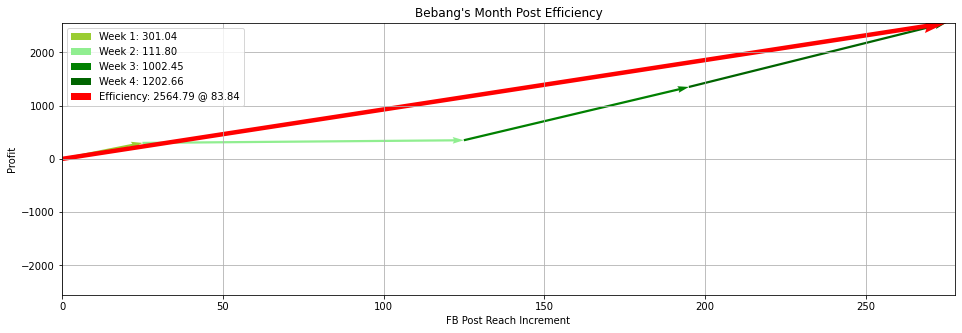

In [96]:
profits3= np.array([300,50, 1000, 1200]) 
reachs3 = np.array([25,100, 70, 80]) 
month_profit_trace(profits3,reachs3,make_figs=False)


## Guide Questions:
<br>1. What is the relationship between the FB post reach and the profit?
<br>
 <br>FB post reach and profits are directly proportional to each other, because as the FB post increase the profits follows.
 <br>
<br> 2. Why is profit in the y-axis and FB post reach on the x-axis and not the other way around?

<br>   Because the profits is the dependent variable and the fb post reach is the independent variable meaning, the profits are dependent on the amoount of fb post reached [a]. 
<br>
<br>3. Kindly explain the process of plotting the post efficiency vectors. 
<br> 
         <br>plt.quiver(0,0, week_total[0], week_total[1], angles='xy', scale_units='xy',scale=1, color='red', width=0.005,label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))
<br>              
              
<br> Here you can see the code to plot the post efficiency vectors. We can divide the code into a total of 6 parts for it to be easily understood. The first part is the code for the length of the vector these are 0, 0, week_total[0], week_total[1]. The 0,0 are the origin or initial state of the vector, and the week_total[0]/[1] are the endpoint or final place. The second part is the angles and scale_unit. These are responsible for the plotting in the x and y-axis of the plane. The third is the scale, which is responsible for the scaling of the variables inside the plane. The fourth is the color, which gives color to the arrow/vector. The fifth is the width, which is responsible for the thickness of the arrow/vector. Lastly, the label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance,reach_gradient)), which is responsible for the creation of the "Efficiency" part in the legend.
<br> 
<br>4. Provide a necessary equations that are representative to finding the  performance_week  and  reach_gradient.
 <br>performance_week = $  \sqrt{x_t^2 + y_t^2} $
<br> reach_gradient = $ \arctan({\frac{y_t}{ x_t\alpha})}$
<br>
<br>5. Try to alter the 'reach' and 'profit' values to display different scenarios. Save at least 3 scenarios then append and discuss the figures in your report. 
<br> (At lab report)

<br>6. What can be observed and concluded with the behavior of the vectors with respect to post efficiency? {not}
<br> It always 